In [1]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(0)  # For reproducibility
data = {
    'Student_ID': range(1, 101),
    'Exam_Score': np.random.normal(loc=75, scale=10, size=100)  # Normal distribution
}

df = pd.DataFrame(data)
print(df.head())


   Student_ID  Exam_Score
0           1   92.640523
1           2   79.001572
2           3   84.787380
3           4   97.408932
4           5   93.675580


In [3]:
print(df['Exam_Score'].describe())

count    100.000000
mean      75.598080
std       10.129598
min       49.470102
25%       68.561433
50%       75.940961
75%       82.370774
max       97.697546
Name: Exam_Score, dtype: float64


In [5]:
import scipy.stats as stats

# Calculate the mean and standard error of the sample
mean_score = df['Exam_Score'].mean()
std_dev = df['Exam_Score'].std()
n = df['Exam_Score'].count()

# Calculate the confidence interval
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(
    confidence_level,
    degrees_freedom,
    loc=mean_score,
    scale=std_dev / np.sqrt(n)
)

print(f"Confidence Interval for the mean exam score: {confidence_interval}")


Confidence Interval for the mean exam score: (73.58814820996596, 77.60801210072373)


**Hypothesis Testing**

In [8]:
# Conduct a t-test
null_mean = 70
t_statistic, p_value = stats.ttest_1samp(df['Exam_Score'], null_mean)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean exam score is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis: The mean exam score is not significantly different from 70.")


T-statistic: 5.526458527950662, P-value: 2.6513104215811184e-07
Reject the null hypothesis: The mean exam score is significantly different from 70.


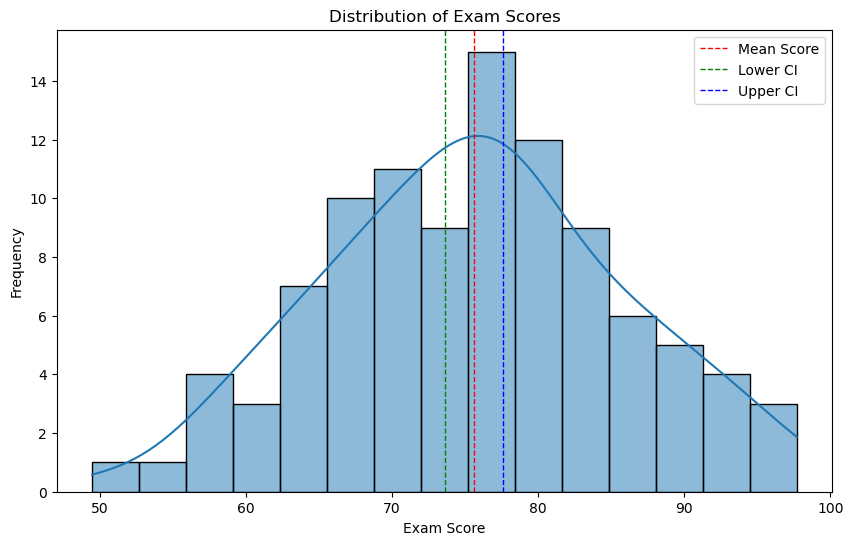

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of exam scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=15, kde=True)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label='Mean Score')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1, label='Lower CI')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=1, label='Upper CI')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
